In [110]:
#import the libaries we need to use

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import us
%matplotlib inline

##  Import display 
from IPython.display import display


### ipywidget libraries
from ipywidgets import HBox, VBox, IntSlider, Play, jslink
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### bqplot libraries
import bqplot
from bqplot import (
    Axis, ColorAxis, LinearScale, DateScale, DateColorScale, OrdinalScale, Mercator, Orthographic,
    OrdinalColorScale, ColorScale, Scatter, Lines, Figure, Tooltip, Map, ColorAxis, AlbersUSA, topo_load
)

In [111]:
#reads into the location.txt file, provides headers
df=pd.read_csv("Datasets/Andropogan_secWeakley2015_test.csv")

In [112]:
df

,scientificName,country,stateProvince,county,decimalLatitude,decimalLongitude
0,Andropogon tenuispatheus,United States,Alabama,Lee,32.601184,-85.355612
1,Andropogon tenuispatheus,United States,Alabama,Macon,32.386023,-85.692607
2,Andropogon tenuispatheus,United States,Alabama,Mobile,30.794258,-88.201790
3,Andropogon tenuispatheus,United States,Alabama,Mobile,30.794258,-88.201790
4,Andropogon tenuispatheus,United States,Alabama,Sumter,32.591029,-88.198798
5,Andropogon tenuispatheus,United States,Florida,Broward,26.151915,-80.488568
6,Andropogon tenuispatheus,United States,Florida,Charlotte,26.906859,-81.893994
7,Andropogon tenuispatheus,United States,Florida,Collier,26.119574,-81.339283
8,Andropogon tenuispatheus,United States,Florida,Miami Dade,25.617111,-80.568220
9,Andropogon tenuispatheus,United States,Florida,Miami Dade,25.617111,-80.568220


In [113]:
df["scientificName"].value_counts()

Andropogon virginicus                    113
Andropogon tenuispatheus                 107
Andropogon capillipes                     31
Andropogon glaucopsis                     30
Andropogon hirsutior                       4
Andropogon virginicus var. decipiens       3
Andropogon dealbatus                       2
Andropogon glomeratus var. glomeratus      1
Name: scientificName, dtype: int64

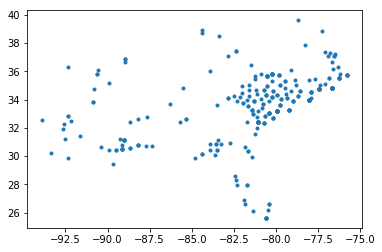

In [114]:
plt.plot(df["decimalLongitude"], df["decimalLatitude"], '.' )

In [116]:
import seaborn as sns

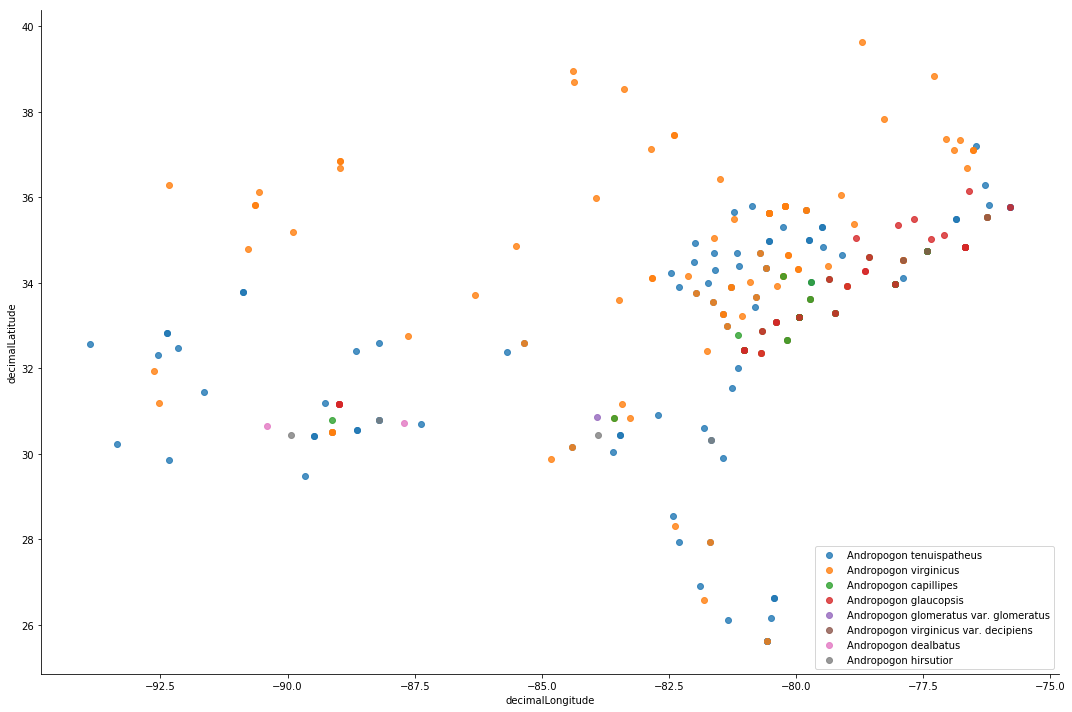

In [165]:
sns.lmplot( x="decimalLongitude", y="decimalLatitude", data=df, fit_reg=False, hue='scientificName', legend=False, size=10, aspect=1.5)
plt.legend(loc='lower right')
plt.savefig('Andropogon_scatter.png', bbox_inches='tight')

In [120]:
from mpl_toolkits.basemap import Basemap

/Users/jessicacheng/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/jessicacheng/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/jessicacheng/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/jessicacheng/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/jessicacheng/anaconda3/lib/python3.6/site-packages/mpl_t

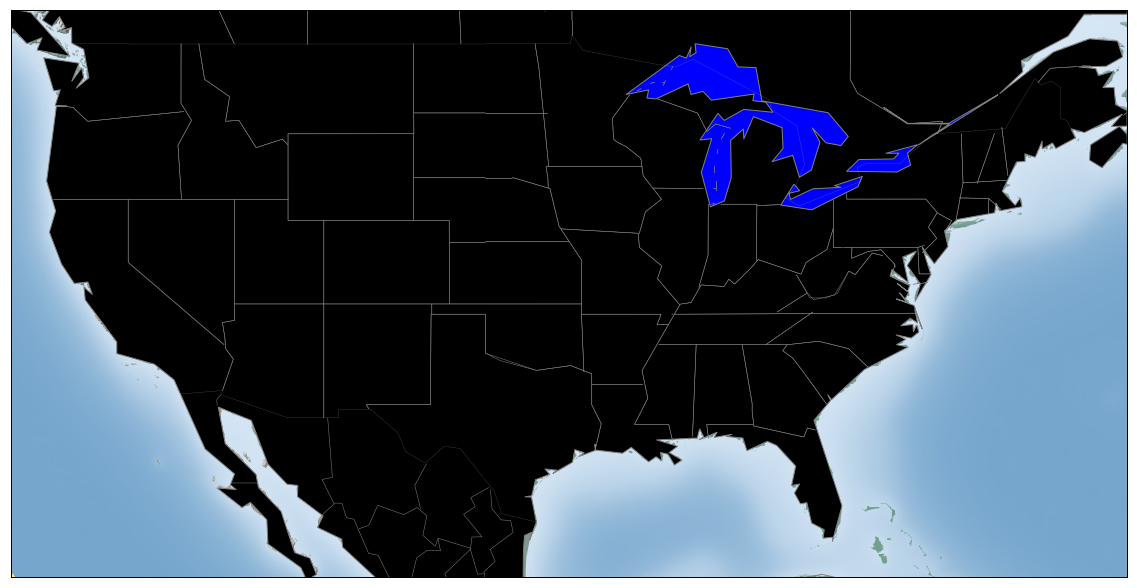

In [149]:
# 1. Draw the map background

fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='mill',
            llcrnrlat = 23.05,
            llcrnrlon = -126.58,
            urcrnrlat = 50.43,
            urcrnrlon = -64.09)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawstates(color='gray')
m.fillcontinents(color='black',lake_color='blue') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
x=df["decimalLongitude"] 
y=df["decimalLatitude"]
df['labels_enc'] = pd.factorize(df['scientificName'])[0]
m.scatter(x,y,c=df['labels_enc'],cmap='Set3',marker="o")


/Users/jessicacheng/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/jessicacheng/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/jessicacheng/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/jessicacheng/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


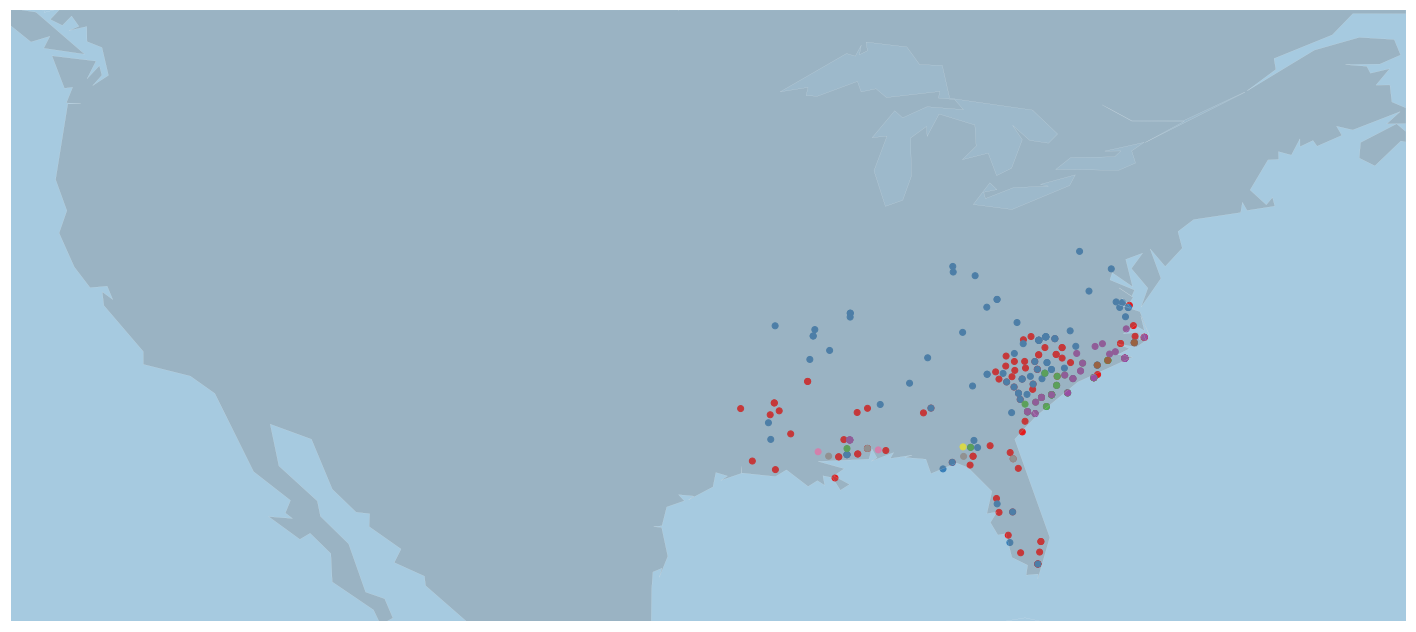

In [164]:
fig = plt.figure(figsize=(25, 25))

m1=Basemap(llcrnrlat = 23.05,
            llcrnrlon = -126.58,
            urcrnrlat = 50.43,
            urcrnrlon = -64.09)
m1.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m1.fillcontinents(color='grey', alpha=0.3)
m1.drawcoastlines(linewidth=0.1, color="white")
x=df["decimalLongitude"] 
y=df["decimalLatitude"]
df['labels_enc'] = pd.factorize(df['scientificName'])[0]
m1.scatter(x,y,c=df['labels_enc'],cmap='Set1',marker="o")
plt.savefig('Andropogon_distribution.png', bbox_inches='tight')